In [2]:
with open('names.txt') as f:
    words = f.read().splitlines()

In [3]:
words[0]

'emma'

In [4]:
len(words)

32033

In [5]:
import torch
import string
import itertools

In [6]:
# Get all the alphabets
alphas =  "." + string.ascii_lowercase


In [6]:
# Indexing for X
itos = {i: c1+c2 for i, (c1,c2) in enumerate(sorted(itertools.product(alphas, alphas)))}
stoi = {v:k for k,v in itos.items()}

In [7]:
# Indexing for y
ystoi = {a:i for i, a in enumerate(alphas)}

In [8]:
# Create the training set
xs = []
ys = []
for word in words:
    word = "." + word + "."
    for c1,c2, c3 in zip(word, word[1:], word[2:]):
        xs.append(stoi[c1+c2])
        ys.append(ystoi[c3])

In [46]:
# Initial the weights
# TODO: Use a generator
w = torch.randn(27*27, 27, requires_grad=True)

In [10]:
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [11]:
ys.dtype

torch.int64

In [12]:
from torch.nn import functional as F

In [71]:
import tqdm

In [ ]:
class Linear:
    def __init__(self,fan_in, fan_out, bias=True):
        weight = torch.randn((fan_in, fan_out), generator=g)
        self.bias = torch.zeros(fan_out) if bias else None
    
    def __call__(self, x):
        self.out =   self.weight @ x
        if self.bias:
            self.out += self.bias
        return self.out
    
    def parameters(self):
        return self.weight + ([] if self.bias is None else [self.bias])
    
  

In [7]:
from dataclasses import dataclass

In [ ]:
@dataclass
class HyperParams:
    emb_size: int =  10
    batch_size = 

In [86]:
losses = []
for epoch in tqdm.tqdm(range(200)):
    # Forward Pass
    xenc = F.one_hot(xs, num_classes=27*27).float()
    yenc = F.one_hot(ys, num_classes=27).float()
    output = (xenc @ w).exp()
    probs = output/output.sum(1, keepdim=True)
    loss = - probs[torch.arange(ys.shape[0]), ys].log().mean()

    # Backward Pass
    w.grad = None
    loss.backward()

    losses.append((epoch+1 , loss.item()))
    learning_rate = 100

    w.data -= w.grad * learning_rate

100%|█████████████████████████████████████████| 200/200 [02:08<00:00,  1.55it/s]


In [76]:
import seaborn as sns

<AxesSubplot: >

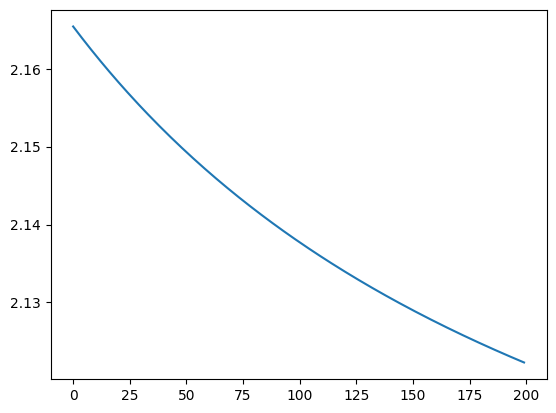

In [87]:
sns.lineplot([i[1] for i in losses])